## Shivam Chauhan Week 3 Assignment : Decision Tree on Titanic Dataset

In [1]:
#loading the libraries 
import pandas as pd
import os
from matplotlib import pyplot as plt


In [2]:
#loading the files
os.getcwd()
os.chdir("C:/Users\Shivam\OneDrive - Northeastern University\STUDY\EAI 6000 - FAI\Week 1 - logistic")
os.getcwd()
df = pd.read_csv("test_data.csv")

In [3]:
#Removing the unique ID which are column 1 and 2. 
df.drop(df.columns[:2], axis=1, inplace = True)
df.head(5)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [36]:
#Creating arrays for train data and test data. Also removing the unique ID which are column 1 and 2. 
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [37]:
#splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Decision Tree

In [38]:
#importing the decision tree classifier model and fitting it into our training data
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


predictions = dtree.predict(X_test)



conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)
conf_matrix


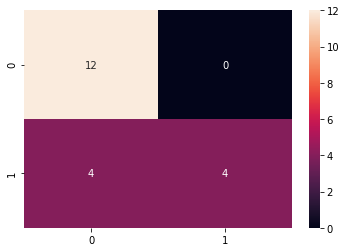

In [60]:
# visualizing the confusion matrics
import seaborn as sn
sn.heatmap(conf_matrix, annot=True)


In [56]:
#checking the accuracy 
accuracy


0.8

In [61]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.50      0.67         8

    accuracy                           0.80        20
   macro avg       0.88      0.75      0.76        20
weighted avg       0.85      0.80      0.78        20



Our Decision Tree Accuracy is 80%. Recall is 1.0 that means this tree did a good job in minimizing the False Negative. In this case False negative is 0.

# Tree Visualization

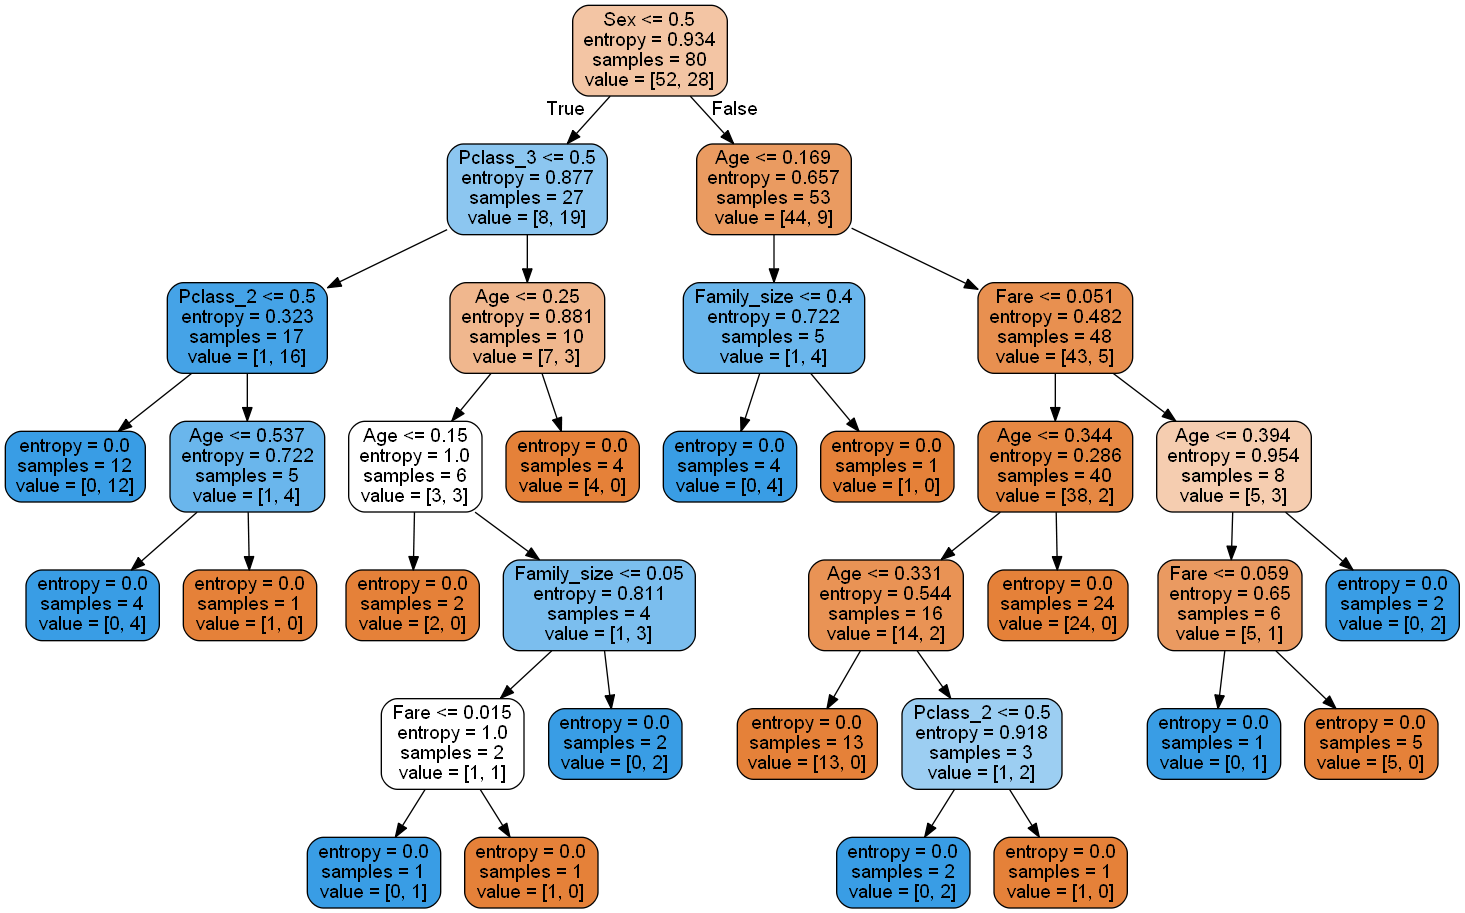

In [109]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

features = df.columns[1:]


dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


1. Our first and most important variable to classify is sex. This means this data set has a great relation to classify if the passenger has survided based on their gender. 

2. In the second split, for male(sex=1), the second most important variable split is on Pclass_3. For females, the second most important variable to slipt is Age. 

As we go down and to more depth, we can see entropy is decreasing. However, we can see this tree is built till its complete depth which makes this model overfitted. In this case it's a small dataset and we can see in all leaf nodes there are one values. 

We can see the value of entropy and number of classes data. If the number of each class is equal then entropy is 1. If only one class is present in a partision then the nodel has entropy 0. 


# Random Forest

In [63]:
#importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
#fitting the data into model 
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))


[[12  0]
 [ 3  5]]


In [68]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.62      0.77         8

    accuracy                           0.85        20
   macro avg       0.90      0.81      0.83        20
weighted avg       0.88      0.85      0.84        20



After applying Random Forest, the accuracy of the model increased 5% to 85%. Results are the average(majority) of the results from 100 trees. In this case also recall is 1.0. 